In [1]:
# Import TensorFlow and Keras modules for building and training the CNN

import tensorflow as tf
from tensorflow.keras import layers, models

# Import libraries for numerical operations and visualization

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the Fashion MNIST dataset from Keras datasets

fashion_mnist = tf.keras.datasets.fashion_mnist

# The dataset is split into training and testing sets

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names corresponding to the labels in the dataset

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

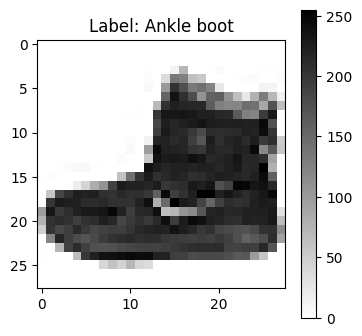

In [3]:
# Display the first image in the training dataset

plt.figure(figsize=(4, 4))
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.title(f"Label: {class_names[train_labels[0]]}")
plt.show()

In [4]:
# Normalize the pixel values of the images to the range [0,1]

train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Adjust the image dimensions to add a single channel (grayscale)

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

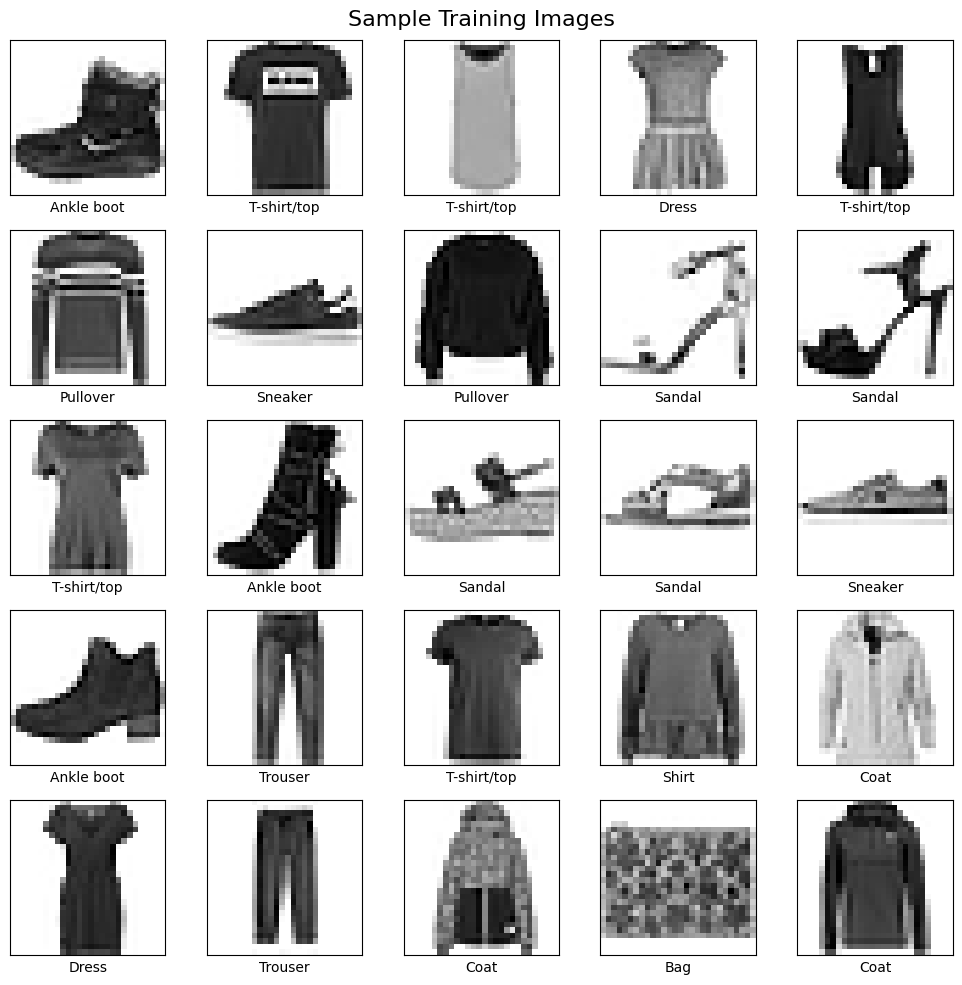

In [6]:
# Display the first 25 images from the training set with their class labels

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.suptitle("Sample Training Images", fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
# Define the input shape for grayscale Fashion MNIST images

input_shape = (28, 28, 1)

# Build a Sequential Convolutional Neural Network (CNN)

model = tf.keras.Sequential()

model.add(layers.Input(shape=input_shape))

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(10))

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [8]:
# Train the CNN model on the training data for 10 epochs

history = model.fit(train_images, train_labels, epochs=10)

# Evaluate the model on the test set and print the accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.7768 - loss: 0.6166
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8837 - loss: 0.3183
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9071 - loss: 0.2541
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9172 - loss: 0.2239
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9268 - loss: 0.1958
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9344 - loss: 0.1757
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9407 - loss: 0.1524
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9522 - loss: 0.1296
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9535 - loss: 0.1217
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9597 - loss: 0.1078
313/313 - 2s - 7ms/step - accuracy: 0.9091 - loss: 0.2806

Test accuracy: 0.9090999960899353


In [9]:
# Create a probability model by adding a Softmax layer on top of the trained model

probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

# Generate predictions on the test set

predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [10]:
# Function to plot a single image with prediction and label

def plot_image(i, predictions_array, true_label, img):
    
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(
        "{} {:2.0f}% (True: {})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label]
        ),color=color
    )

In [11]:
# Function to plot a bar chart of prediction probabilities for all 10 classes

def plot_value_array(i, predictions_array, true_label):
    
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 

    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

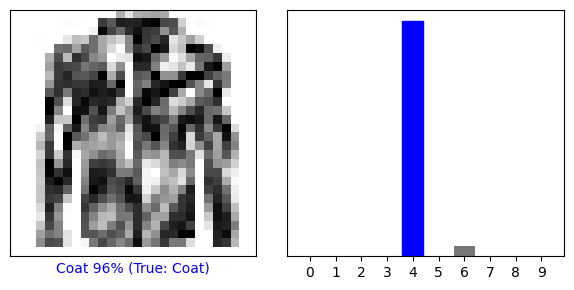

In [14]:
# Plot a single test image and its predicted class probabilities

i = 17

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

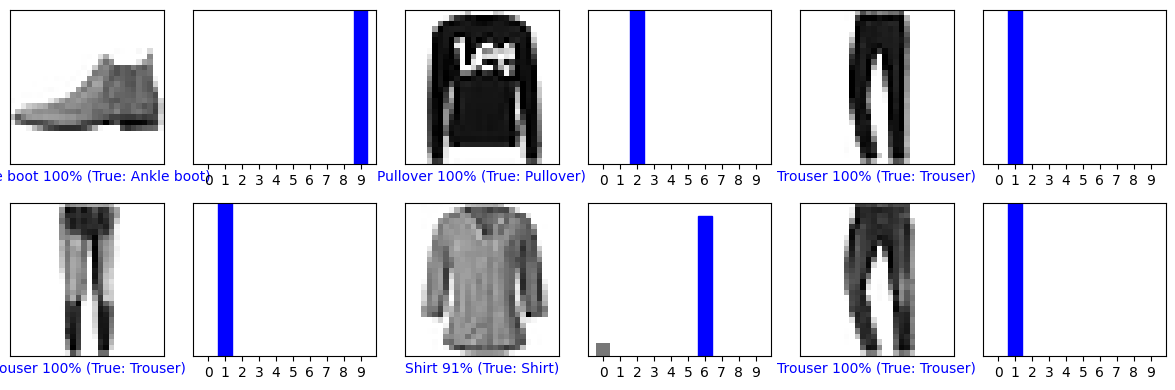

In [15]:
# Plot a grid of test images with their predicted labels and probability distributions

num_rows = 2
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

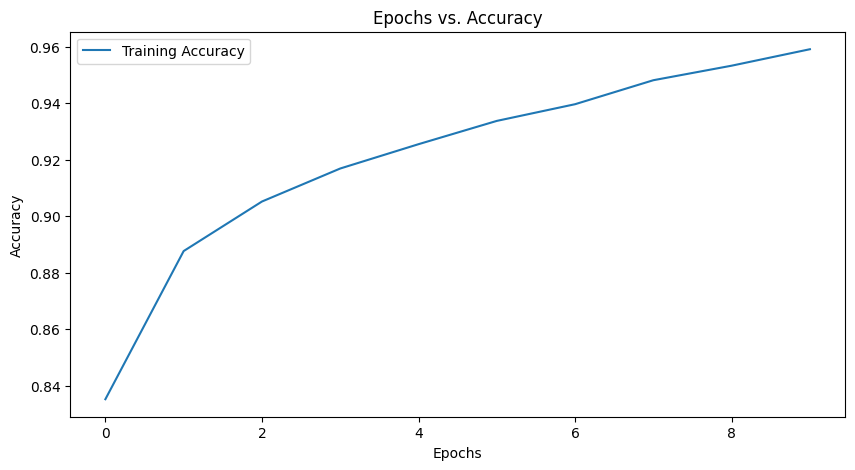

In [16]:
# Plot the training accuracy over epochs

plt.figure(figsize=(10, 5))

plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.title('Epochs vs. Accuracy')

plt.show()

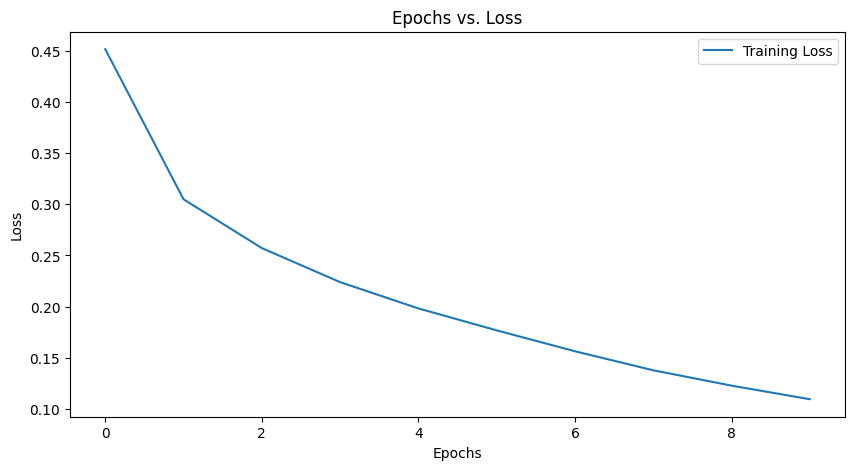

In [17]:
# Plot the training loss over epochs

plt.figure(figsize=(10, 5))

plt.plot(history.history['loss'], label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.title('Epochs vs. Loss')

plt.show()

In [18]:
# Print the model architecture summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)